# Feature Engineering Notebook

### Objectives
- Engineer features for Classification, Regression and Cluster models

### Inputs
- outputs/datasets/cleaned/TrainSet.csv
- outputs/datasets/cleaned/TestSet.csv

### Outputs
- generate a list with variables to engineer

---

## Change working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Comfirm the current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast'

---

## Load Collected data

Train Set

In [4]:
import pandas as pd

train_set = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv")
train_set.head(3)

,appearance,breakfast,service,staff,variety,price,taste,hotel
0,3,No,5,5,2,5,3,3
1,2,No,5,3,2,4,3,2
2,3,No,6,3,2,4,3,3


Test Set

In [5]:
test_set = pd.read_csv("outputs/datasets/cleaned/TestSetCleaned.csv")
test_set.head(3)

,appearance,breakfast,service,staff,variety,price,taste,hotel
0,4,No,5,4,6,6,4,5
1,2,"Yes, next time not",3,8,1,4,4,3
2,2,No,5,3,1,3,2,3


## Data Exploration

Investigate data for potential transformation

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=train_set, minimal=True)
pandas_report.to_notebook_iframe()

## Correlation and PPS Analysis

Same as in the data cleaning notbook

## Feature Engineering

Encode `breakfast` coulmn to nummeric

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

df = train_set.copy()

def label_encoder(pipeline_base):
    le = LabelEncoder()
    pipeline_base["breakfast"] = le.fit_transform(pipeline_base["breakfast"])
    return pipeline_base

pipeline = Pipeline([
    ("Label", FunctionTransformer(label_encoder))
])

df_ordinal = pipeline.fit_transform(df)

df_ordinal.head(3)

,appearance,breakfast,service,staff,variety,price,taste,hotel
0,3,0,5,5,2,5,3,3
1,2,0,5,3,2,4,3,2
2,3,0,6,3,2,4,3,3


Plot out original and transformed dataframes

Distribution of values in appearance

Original


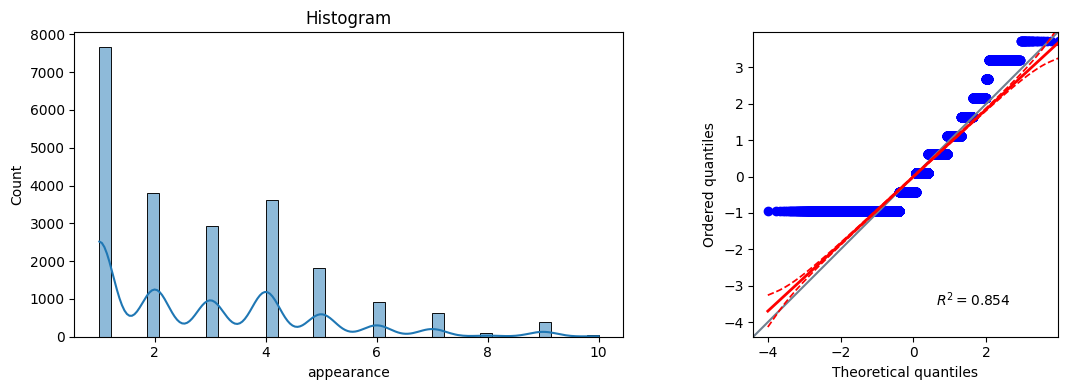

Skewness: 1.06 | kurtosis: 0.8


log


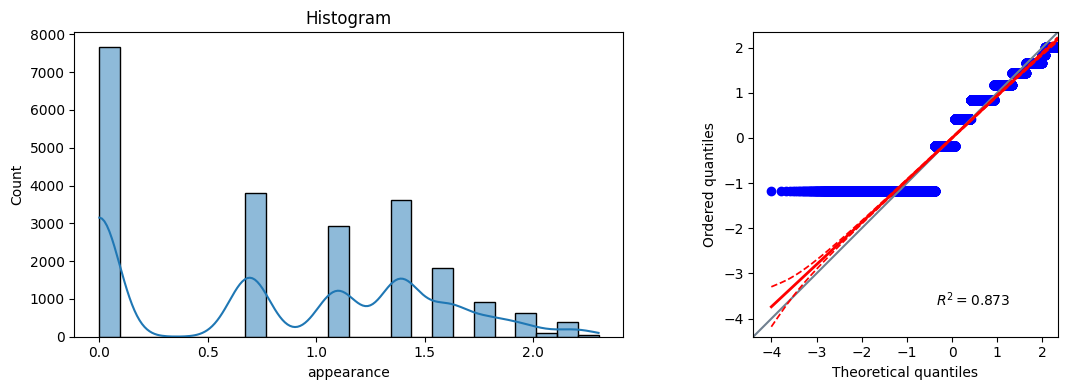

Skewness: 0.1 | kurtosis: -1.32


log_10


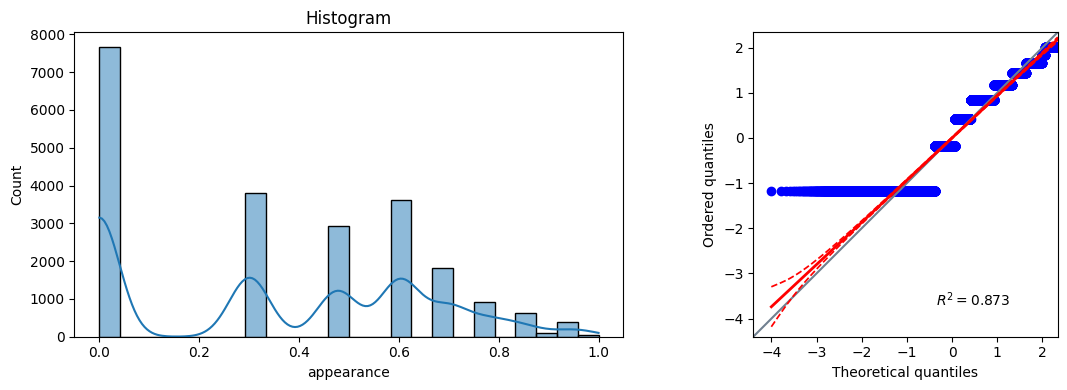

Skewness: 0.1 | kurtosis: -1.32


reciprocal


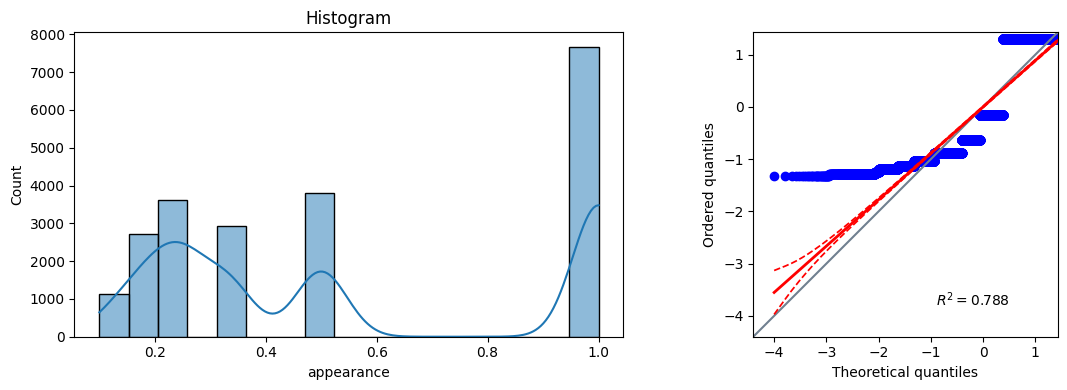

Skewness: 0.37 | kurtosis: -1.6


power


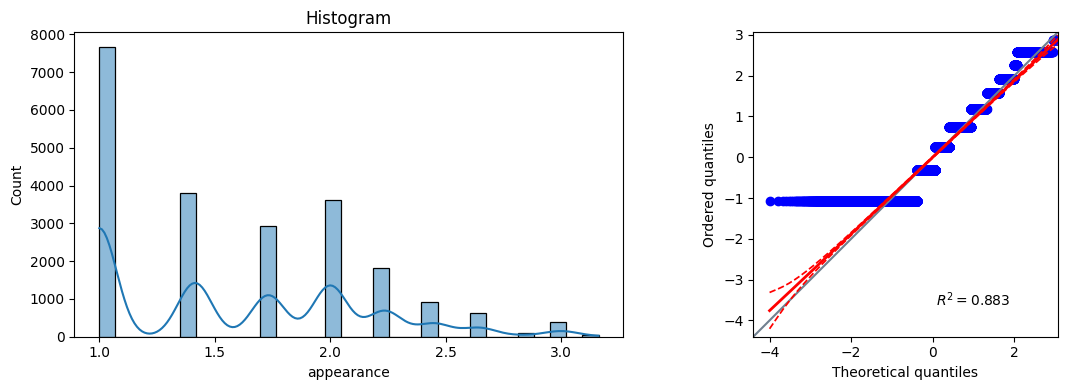

Skewness: 0.51 | kurtosis: -0.68


box_cox


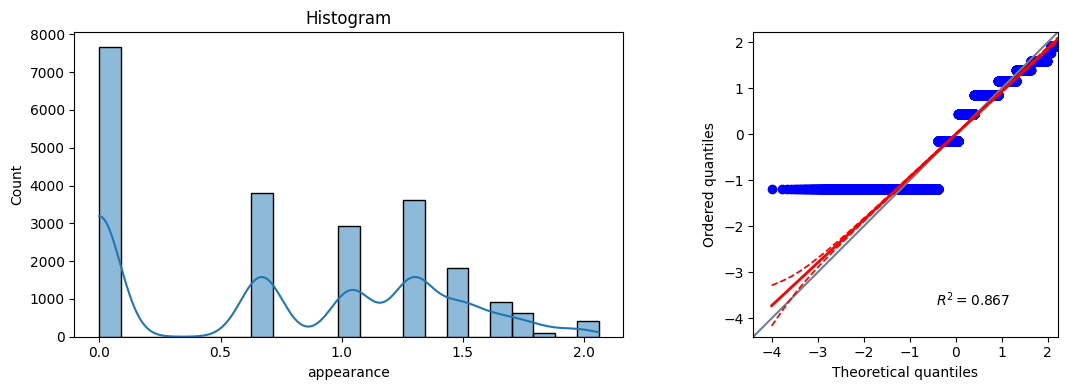

Skewness: 0.03 | kurtosis: -1.39


yeo_johnson


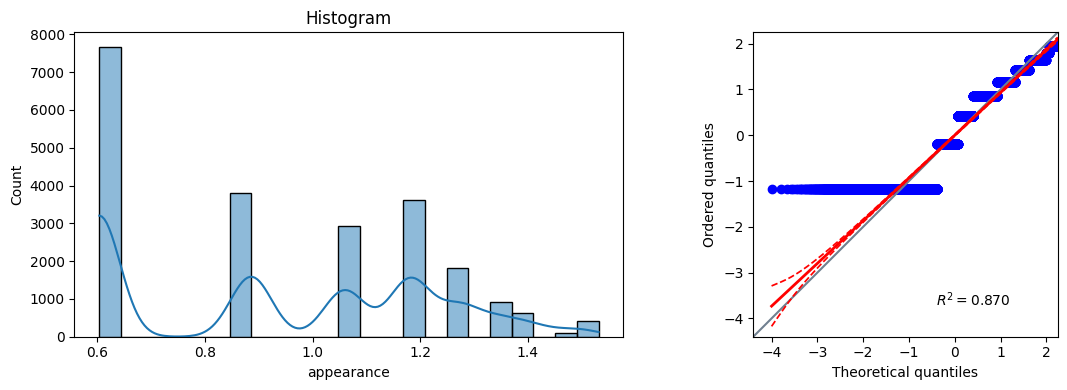

Skewness: 0.09 | kurtosis: -1.37


Distribution of values in service

Original


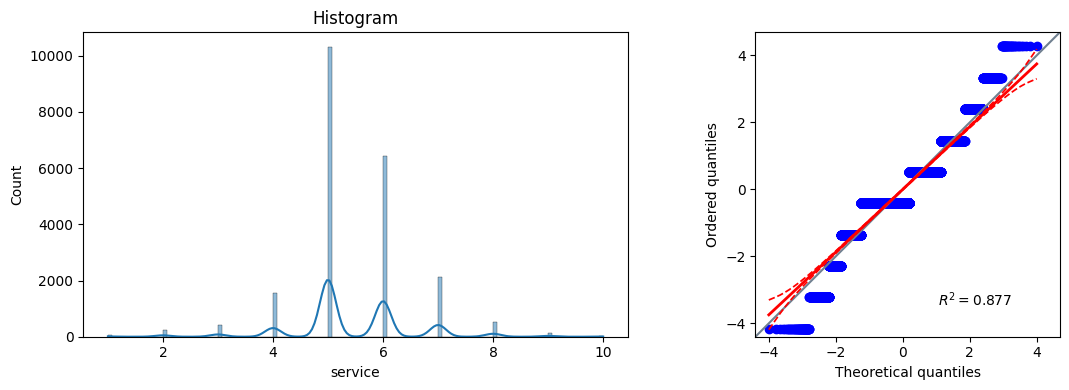

Skewness: 0.05 | kurtosis: 2.36


log


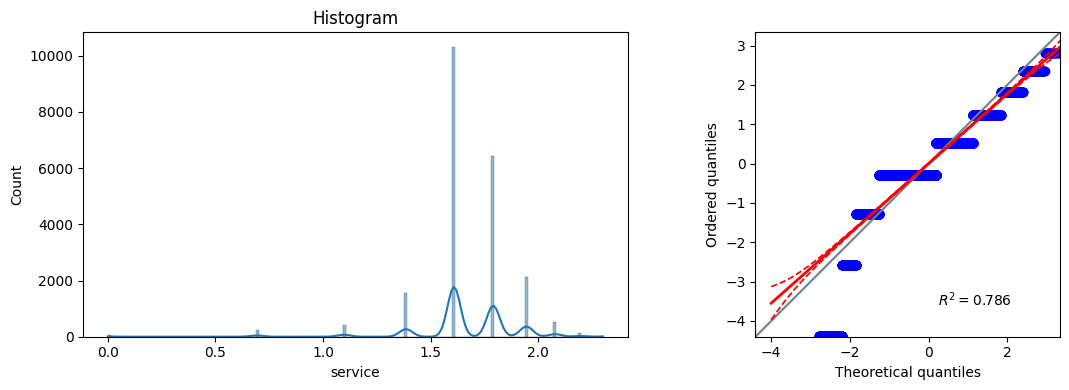

Skewness: -2.02 | kurtosis: 11.08


log_10


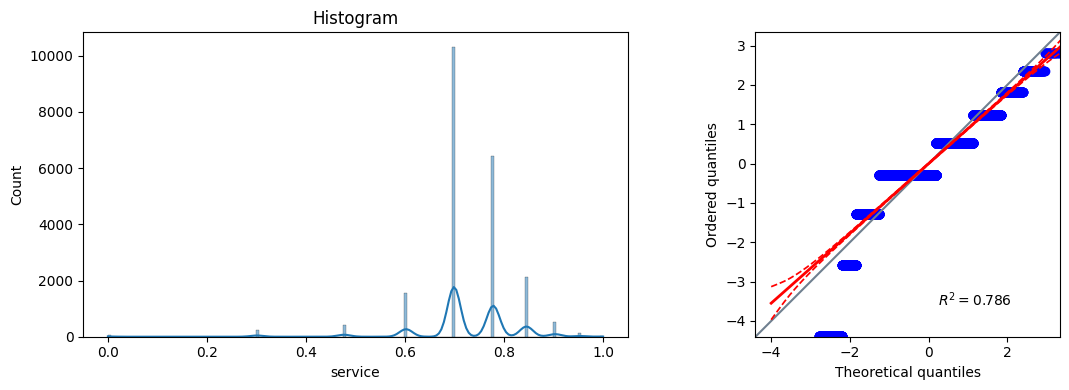

Skewness: -2.02 | kurtosis: 11.08


reciprocal


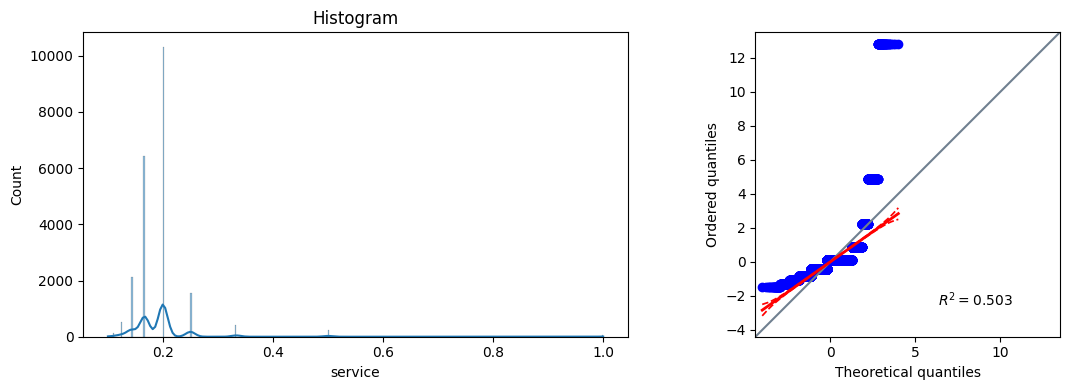

Skewness: 6.78 | kurtosis: 72.24


power


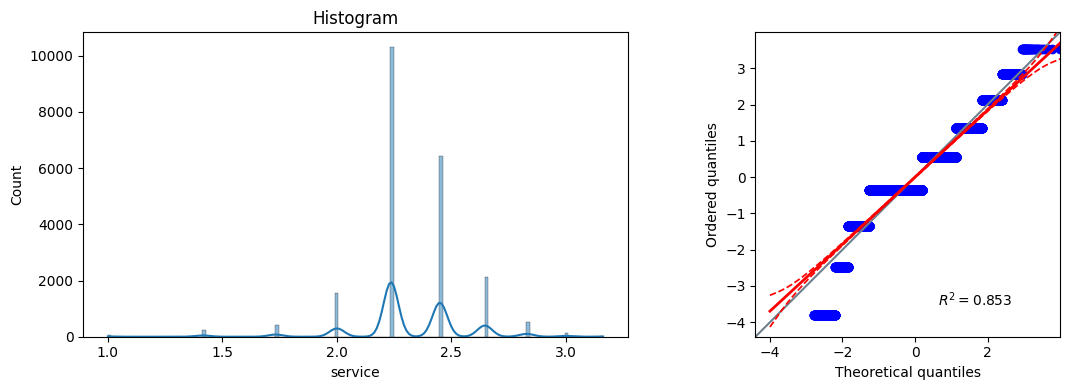

Skewness: -0.79 | kurtosis: 4.33


box_cox


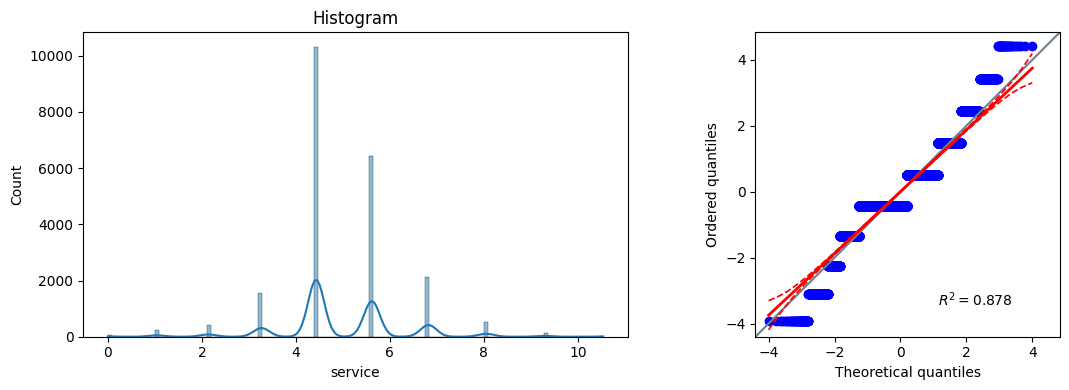

Skewness: 0.19 | kurtosis: 2.25


yeo_johnson


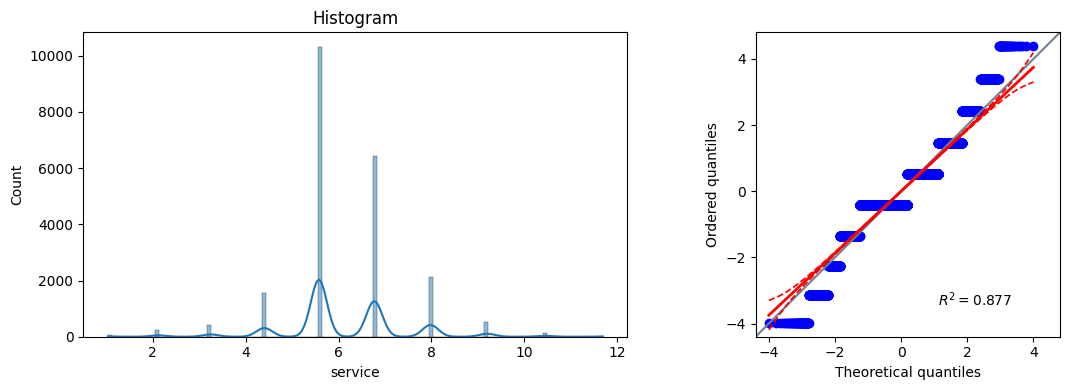

Skewness: 0.15 | kurtosis: 2.28


Distribution of values in staff

Original


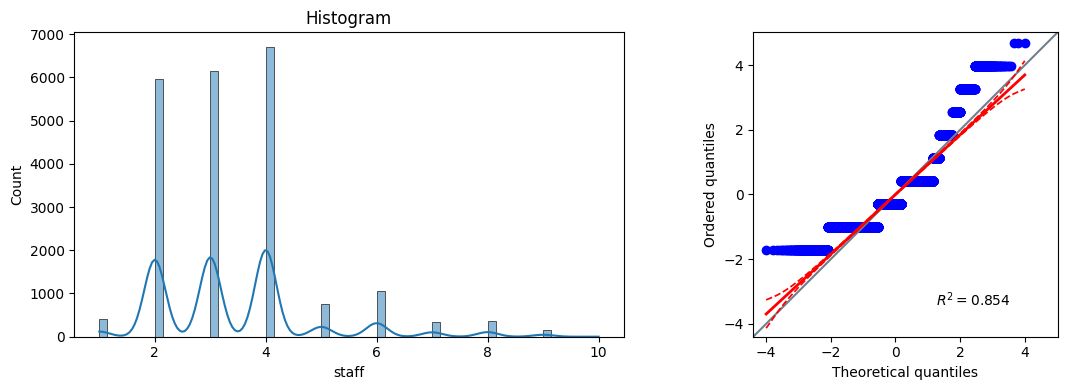

Skewness: 1.3 | kurtosis: 2.41


log


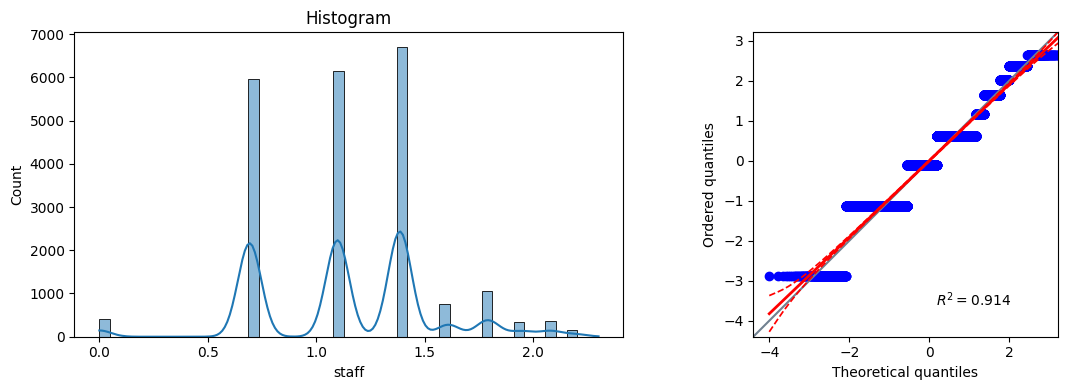

Skewness: -0.03 | kurtosis: 0.27


log_10


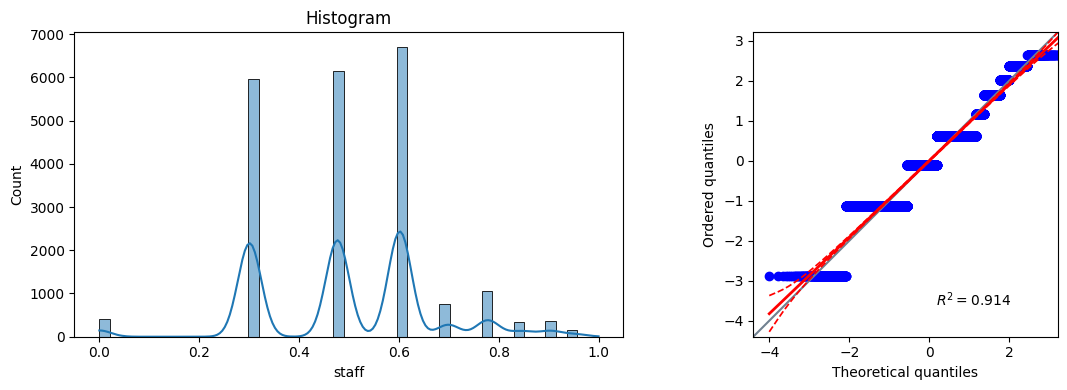

Skewness: -0.03 | kurtosis: 0.27


reciprocal


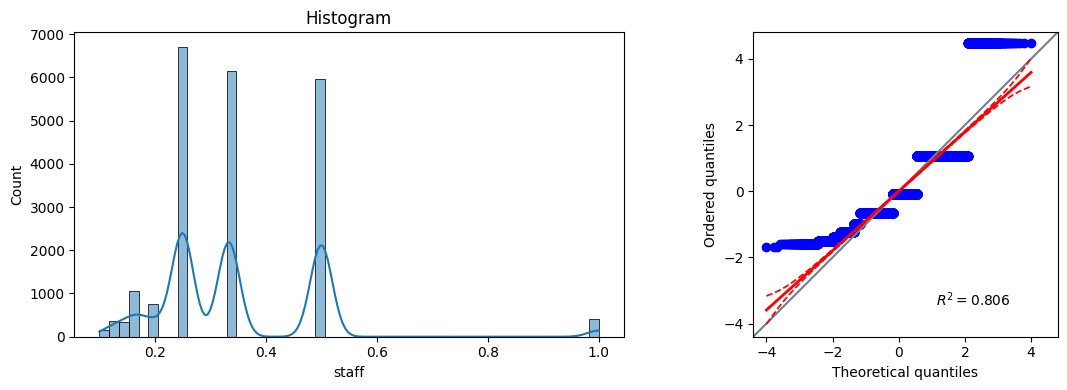

Skewness: 1.65 | kurtosis: 5.19


power


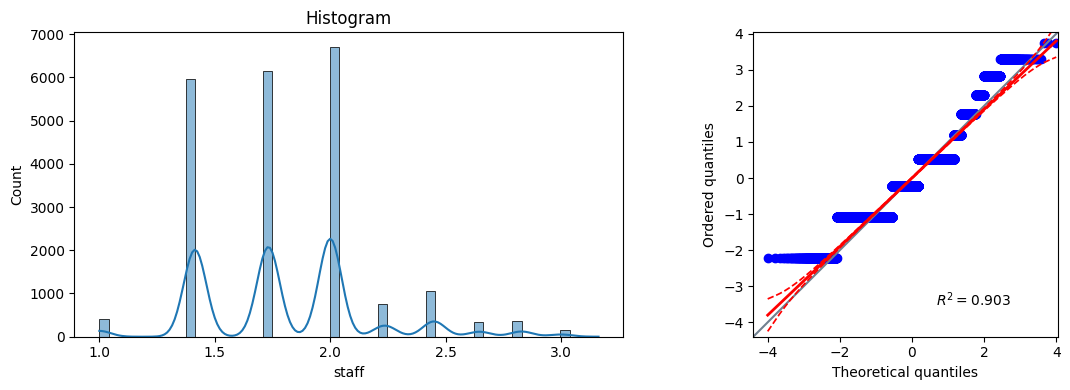

Skewness: 0.63 | kurtosis: 0.72


box_cox


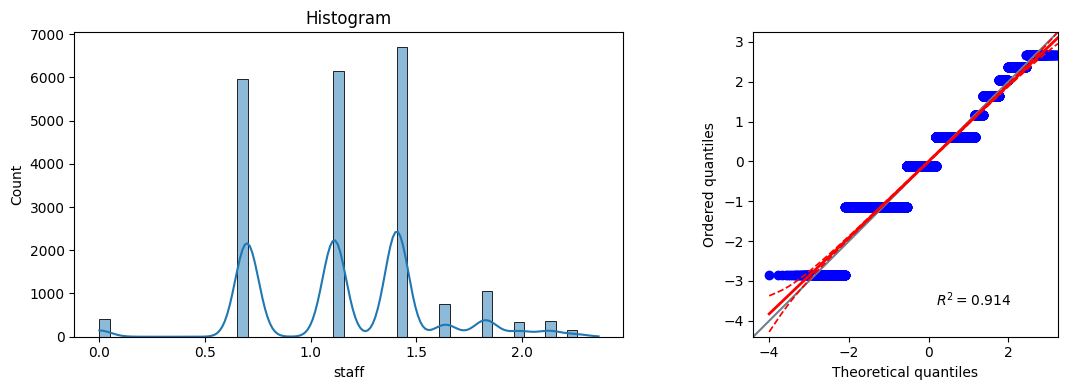

Skewness: 0.0 | kurtosis: 0.26


yeo_johnson


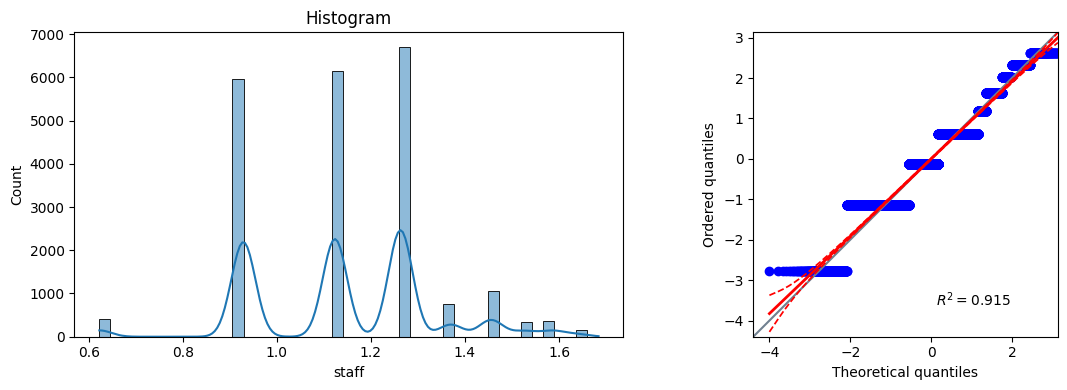

Skewness: -0.0 | kurtosis: 0.08


Distribution of values in variety

Original


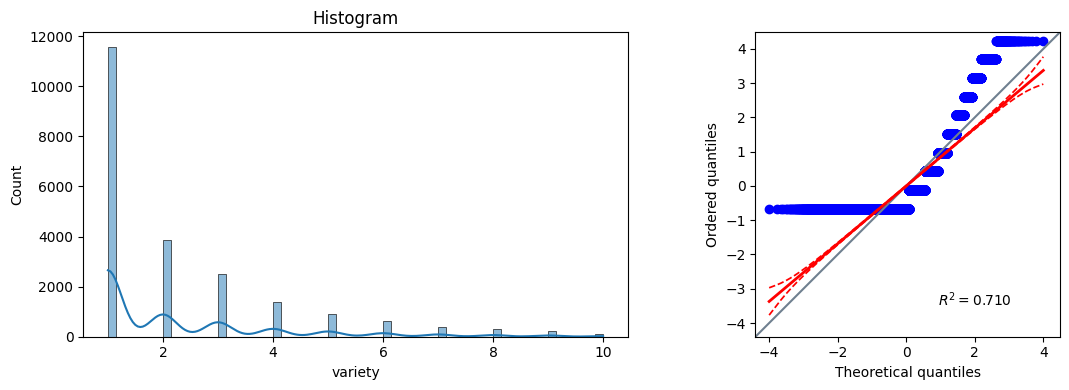

Skewness: 1.86 | kurtosis: 3.26


log


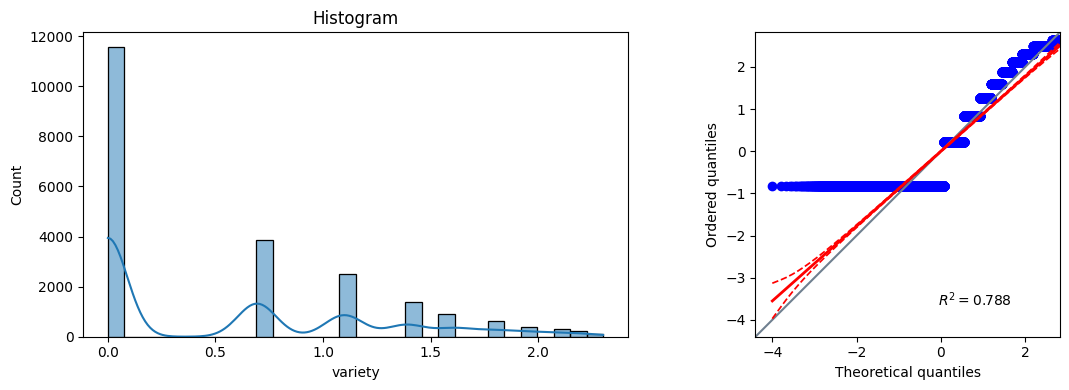

Skewness: 0.82 | kurtosis: -0.58


log_10


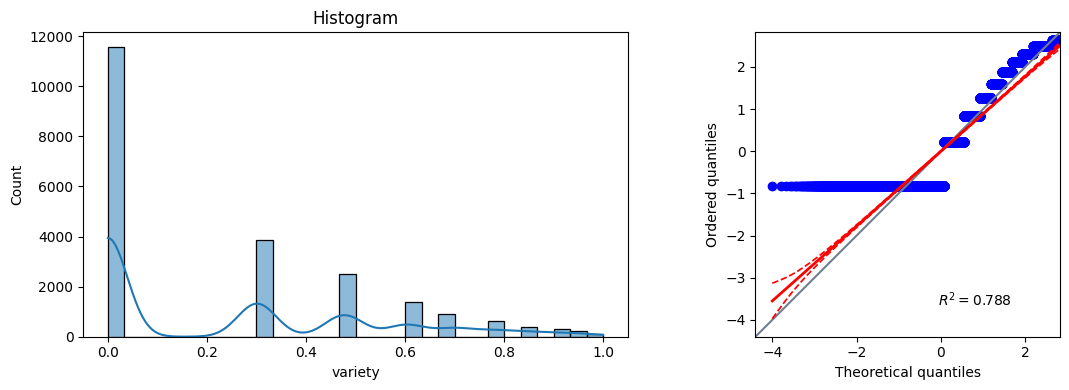

Skewness: 0.82 | kurtosis: -0.58


reciprocal


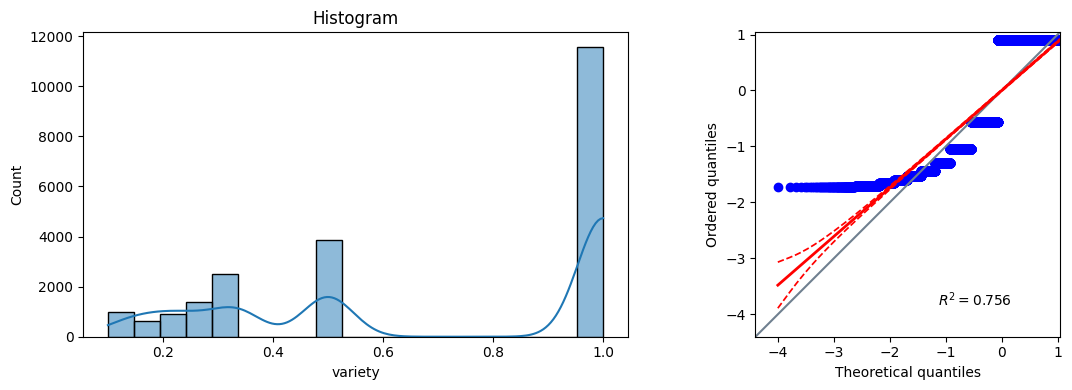

Skewness: -0.34 | kurtosis: -1.63


power


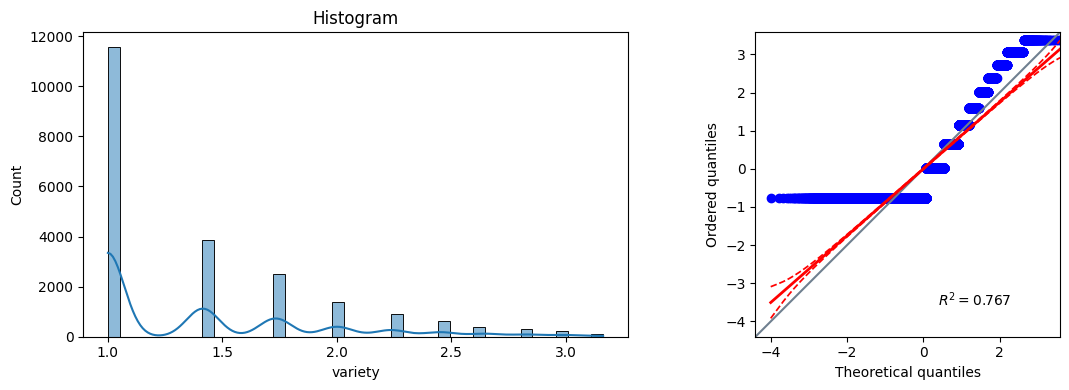

Skewness: 1.27 | kurtosis: 0.8


box_cox


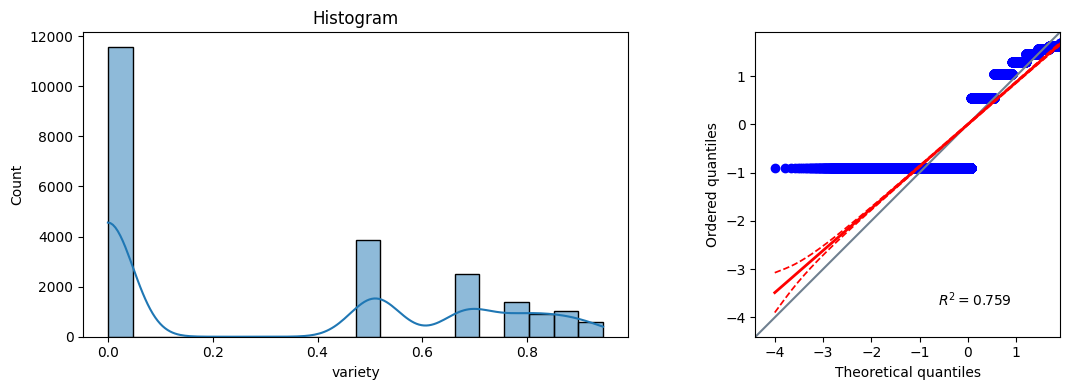

Skewness: 0.36 | kurtosis: -1.6


yeo_johnson


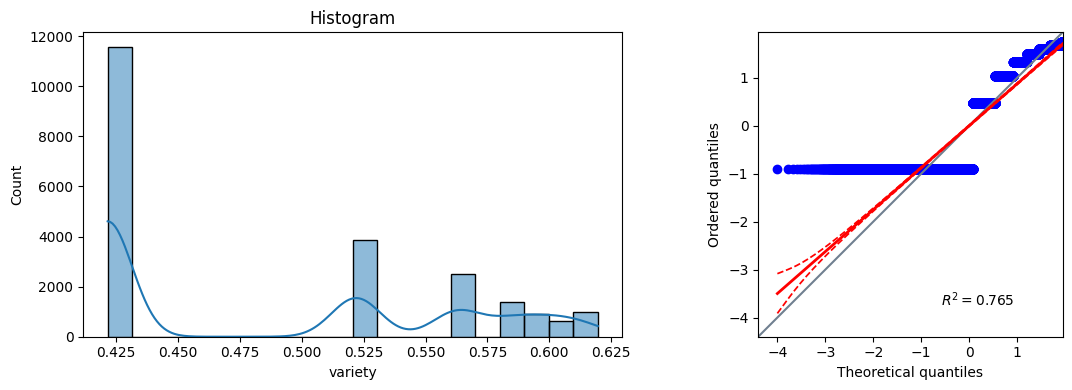

Skewness: 0.41 | kurtosis: -1.52


Distribution of values in price

Original


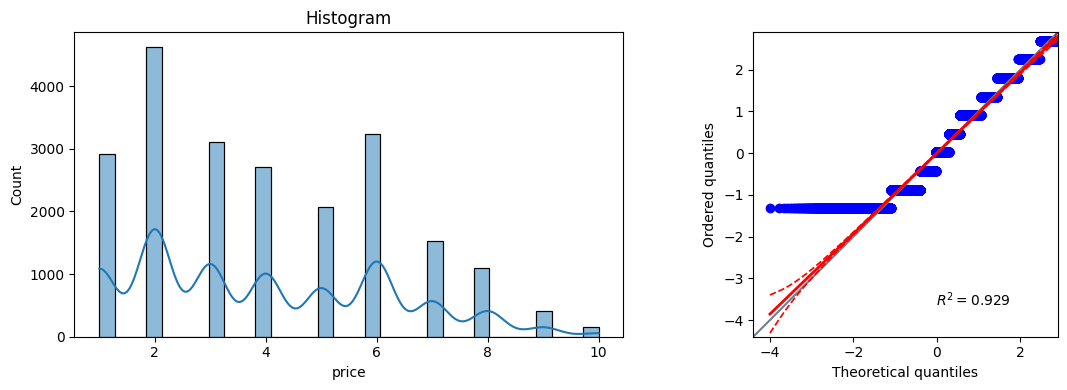

Skewness: 0.46 | kurtosis: -0.76


log


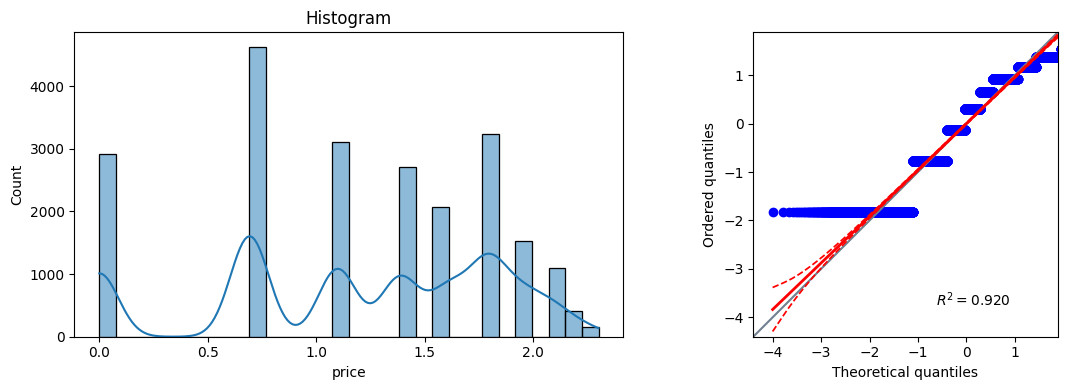

Skewness: -0.42 | kurtosis: -0.85


log_10


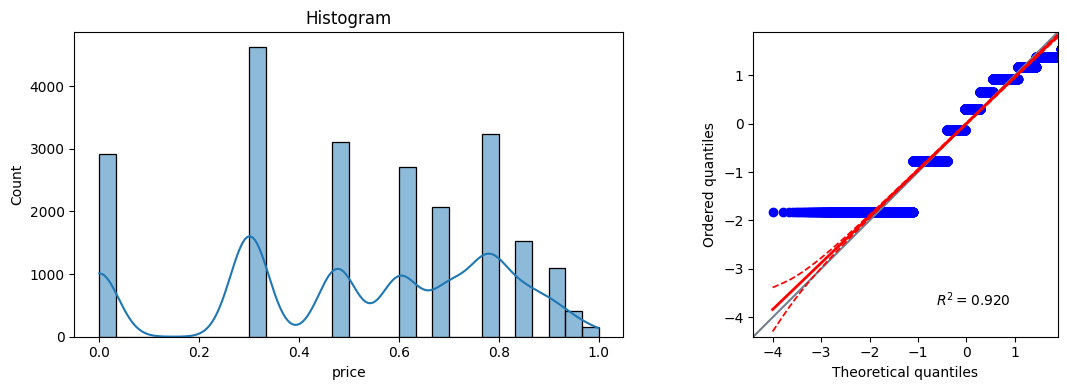

Skewness: -0.42 | kurtosis: -0.85


reciprocal


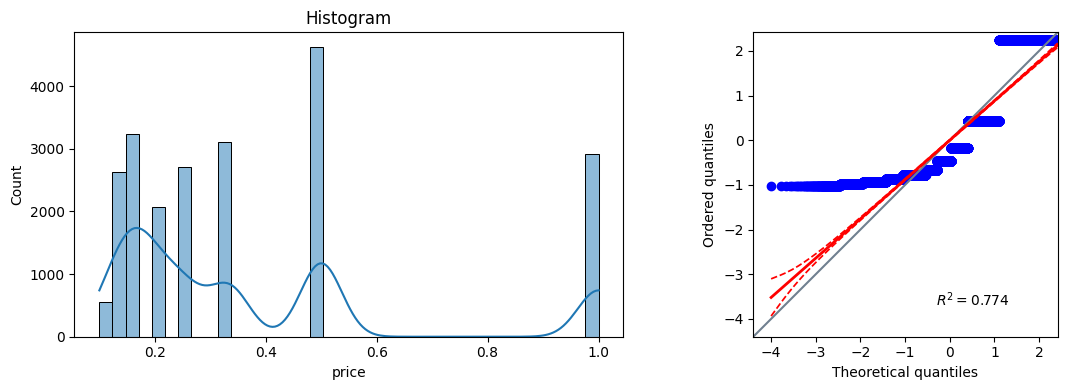

Skewness: 1.32 | kurtosis: 0.62


power


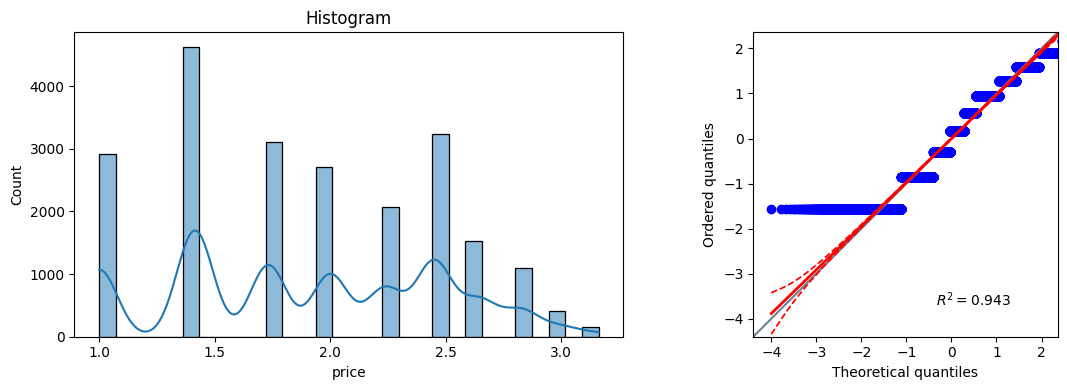

Skewness: 0.04 | kurtosis: -1.05


box_cox


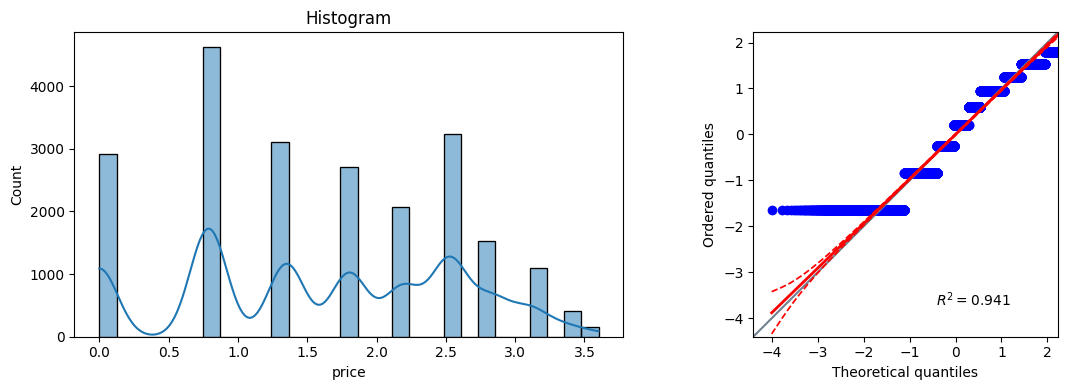

Skewness: -0.09 | kurtosis: -1.05


yeo_johnson


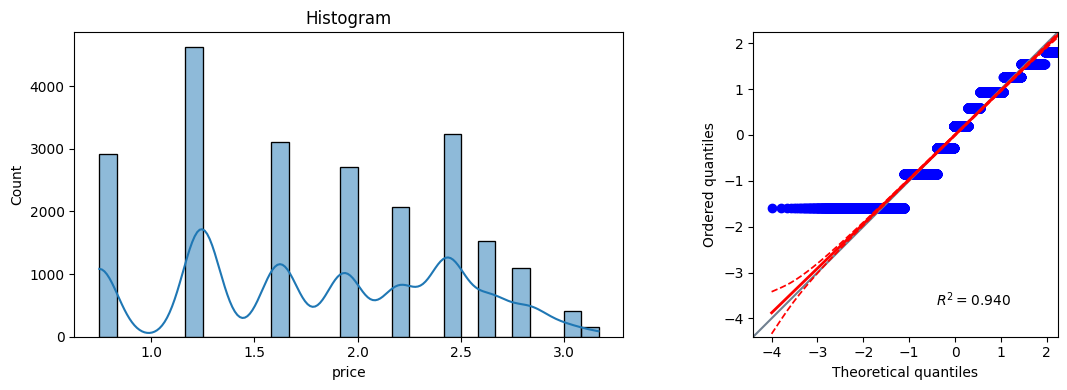

Skewness: -0.04 | kurtosis: -1.09


Distribution of values in taste

Original


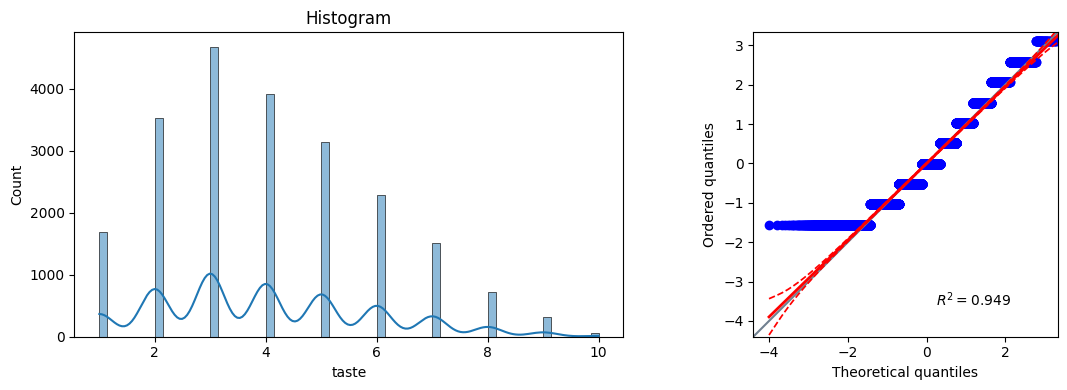

Skewness: 0.51 | kurtosis: -0.32


log


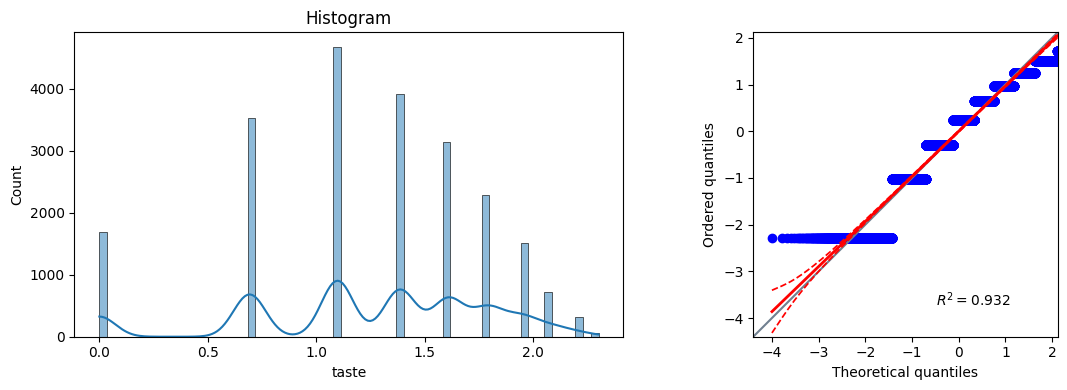

Skewness: -0.63 | kurtosis: -0.07


log_10


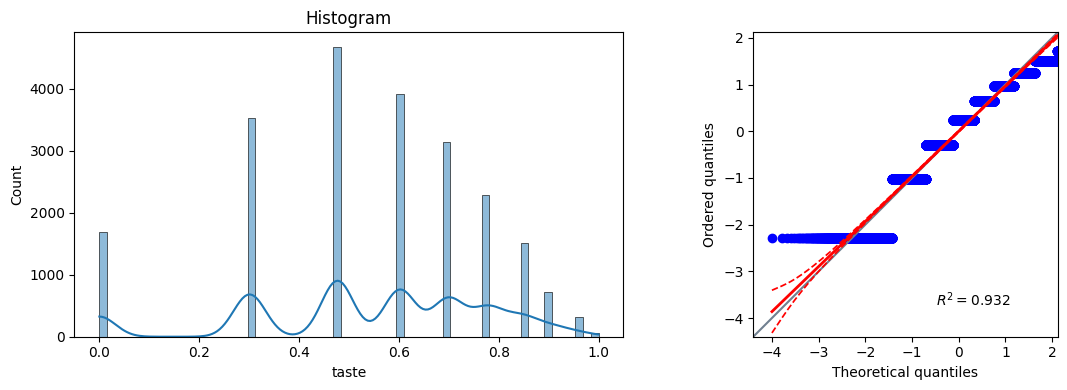

Skewness: -0.63 | kurtosis: -0.07


reciprocal


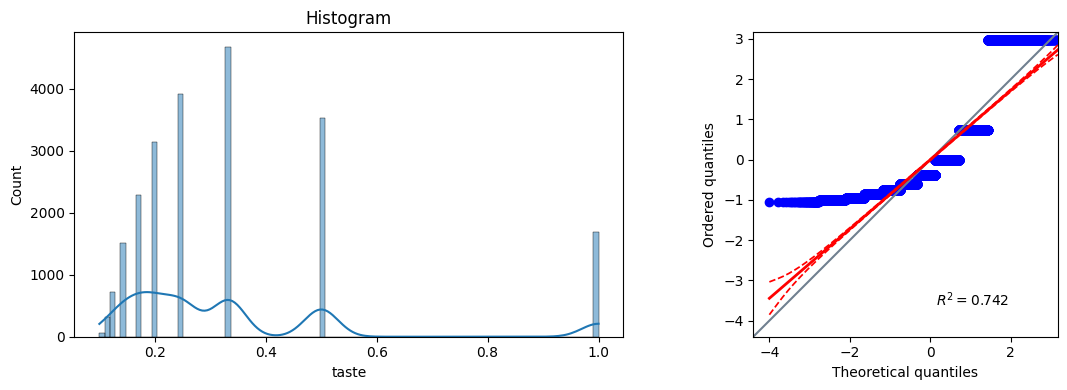

Skewness: 1.89 | kurtosis: 3.11


power


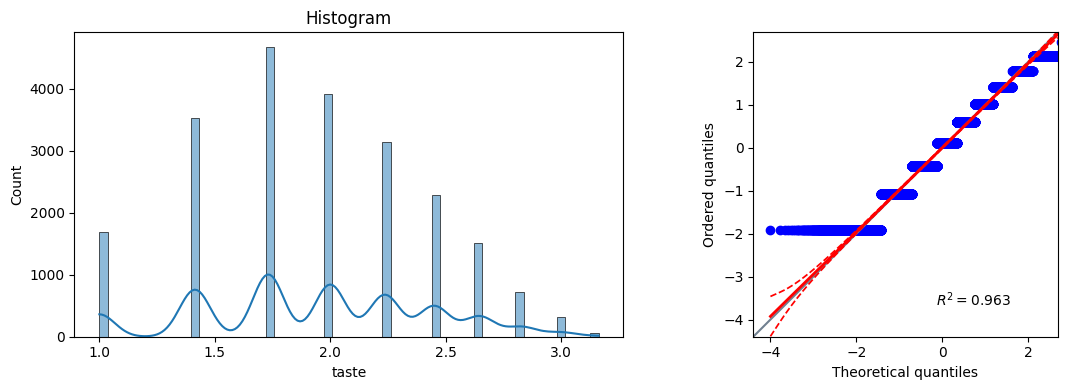

Skewness: -0.03 | kurtosis: -0.58


box_cox


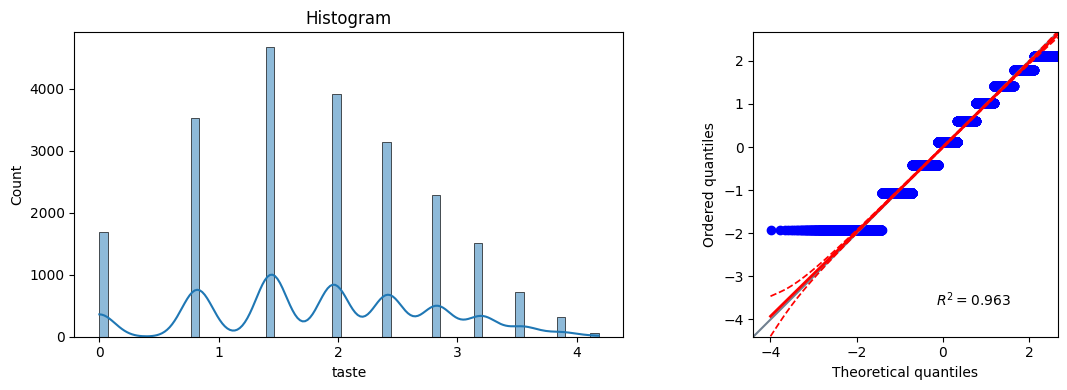

Skewness: -0.05 | kurtosis: -0.58


yeo_johnson


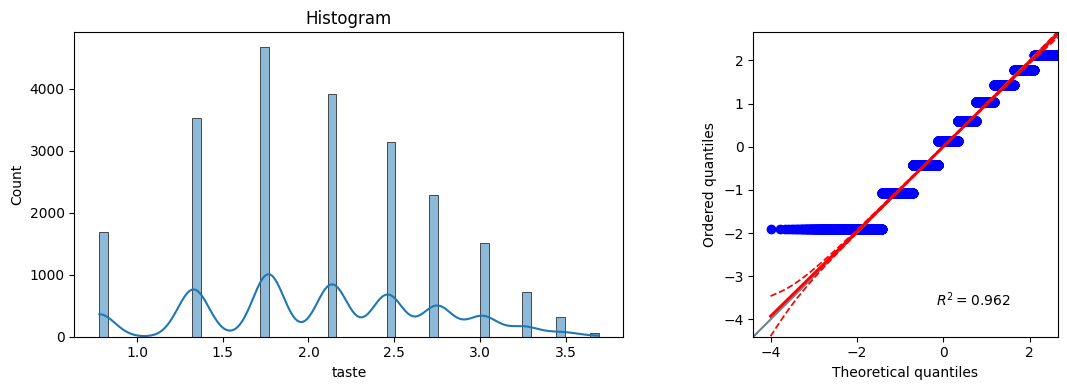

Skewness: -0.03 | kurtosis: -0.62


Distribution of values in hotel

Original


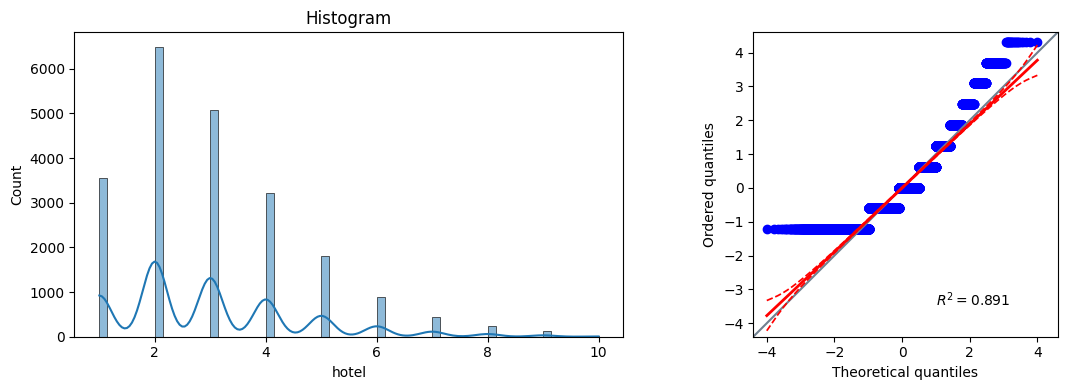

Skewness: 1.07 | kurtosis: 1.24


log


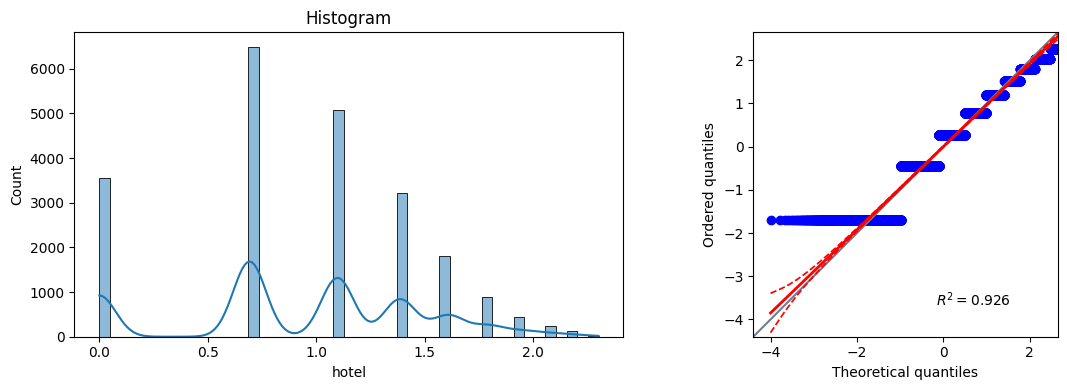

Skewness: -0.19 | kurtosis: -0.6


log_10


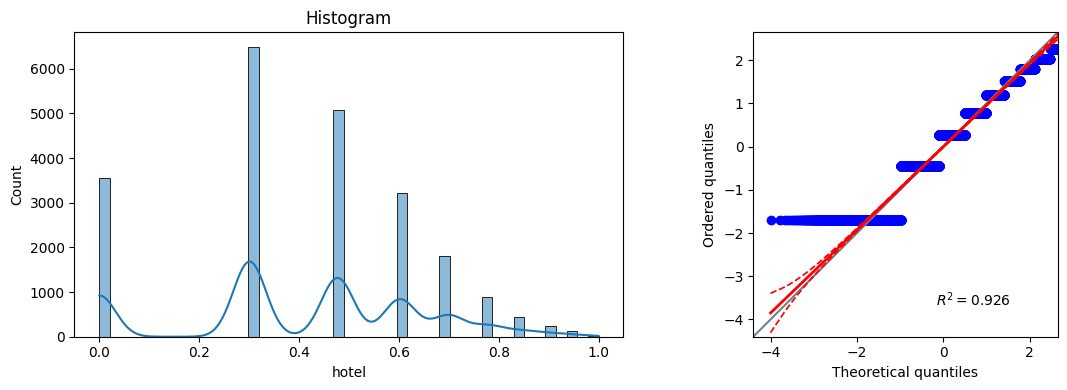

Skewness: -0.19 | kurtosis: -0.6


reciprocal


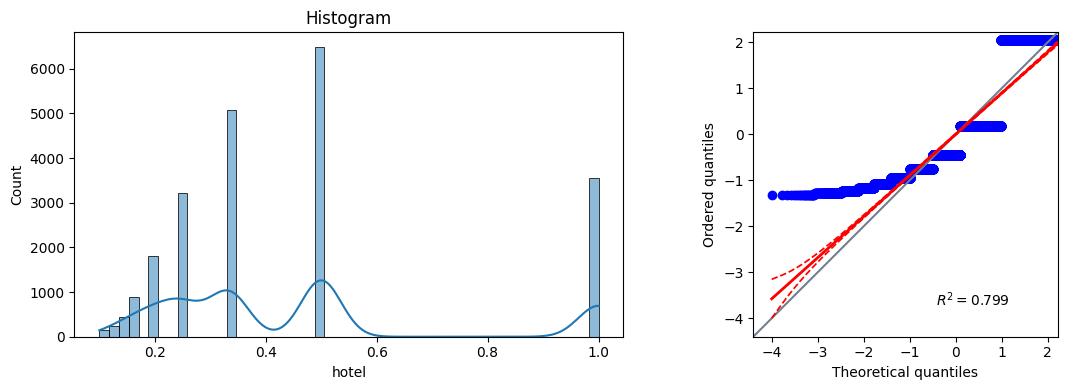

Skewness: 1.12 | kurtosis: 0.12


power


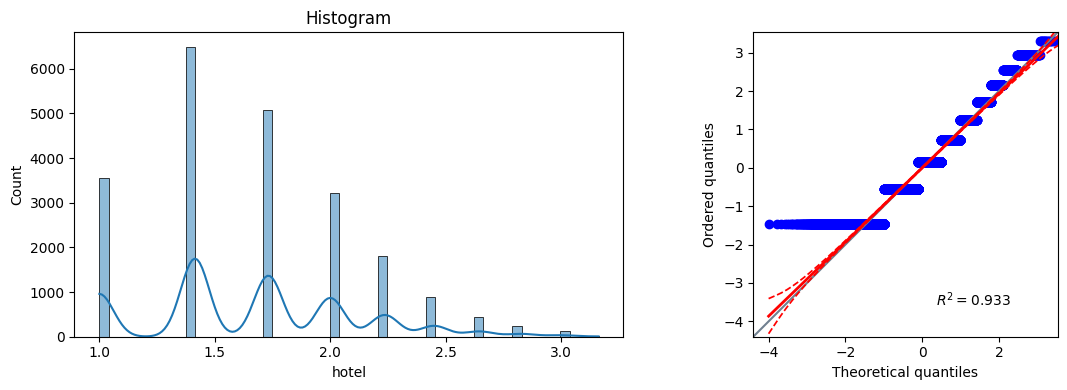

Skewness: 0.42 | kurtosis: -0.19


box_cox


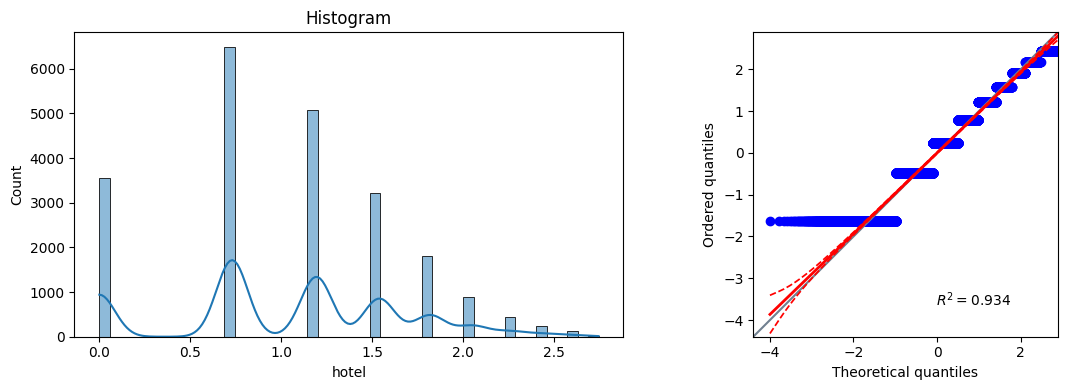

Skewness: -0.02 | kurtosis: -0.56


yeo_johnson


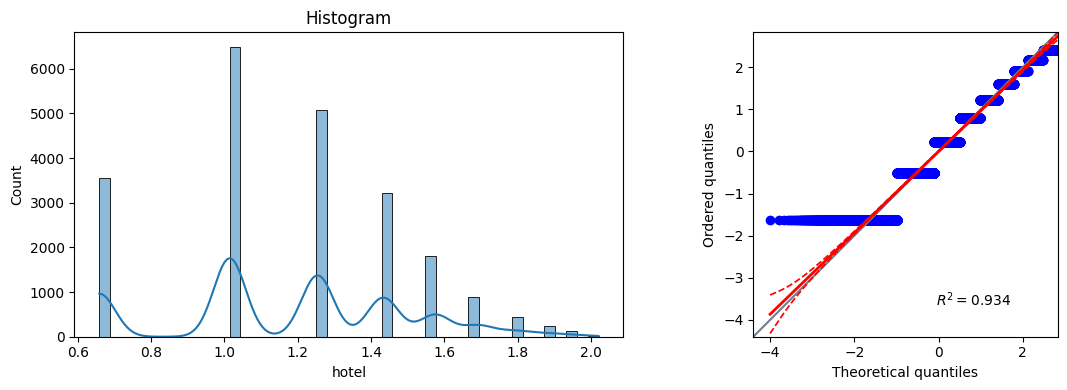

Skewness: 0.01 | kurtosis: -0.62




In [7]:
from sklearn.pipeline import Pipeline
from feature_engine import transformation as vt

import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

df = train_set.drop("breakfast", axis=1).copy()

def calculate_skew_kurtosis(df, col):
    print(f"Skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")

def distribution(df):
    
    for col in df.columns:
        
        transformers = [
            ("log", vt.LogTransformer(variables=col)),
            ("log_10", vt.LogTransformer(variables=col, base='10')),
            ("reciprocal", vt.ReciprocalTransformer(variables=col)),
            ("power", vt.PowerTransformer(variables=col)),
            ("box_cox", vt.BoxCoxTransformer(variables=col)),
            ("yeo_johnson", vt.YeoJohnsonTransformer(variables=col))
        ]
        
        print(f"Distribution of values in {col}\n")
        print("Original")
        plot_distribution(df, col)
        
        for transformer in transformers:
            print(transformer[0])
            pipeline = Pipeline([transformer])
            
            df_transformed = pipeline.fit_transform(df)
            plot_distribution(df_transformed, col)
    


def plot_distribution(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.histplot(data=df, x=col, kde=True, discrete=False, ax=axes[0])
    axes[0].set_title("Histogram")
    pg.qqplot(df[col], dist="norm", ax=axes[1])
    plt.tight_layout()
    plt.show()
    calculate_skew_kurtosis(df, col)
    print("\n")

distribution(df)

- BoxCox transformation improves ``appearance`` and ``staff``
- Yeo Johnson transformation improves `price`, `taste` and `hotel`

Add them to the pipline

In [ ]:
df=train_set.copy()

pipeline = Pipeline([
    ("Label", FunctionTransformer(label_encoder)),
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head(3)

,appearance,breakfast,service,staff,variety,price,taste,hotel
0,1.041307,0,5,1.639074,2,2.200498,1.767169,1.253906
1,0.670034,0,5,1.112368,2,1.934523,1.767169,1.014322
2,1.041307,0,6,1.112368,2,1.934523,1.767169,1.253906


## Smart Correlated Selection Variables

In [21]:
from feature_engine.selection import SmartCorrelatedSelection

df_engineering = df_transformed.copy()

corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'appearance', 'price', 'variety'}]

In [22]:
corr_sel.features_to_drop_

['price', 'appearance']

---

## Conclusion

Feature Engineering Transformers
- Label Encoder: `["breakfast"]`
- BoxCox transformation: `["appearance", "staff"]`
- Yeo Johnson transformation: `["price", "taste", "hotel"]`
- Smart Correlated Selection: `['price', 'appearance']`